In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [3]:
import pandas as pd
import glob

In [13]:
# 1. 모든 parquet 파일 경로 가져오기
file_list = glob.glob('open/train/1.회원정보/2018*_train_회원정보.parquet')

# 2. 데이터프레임 리스트 생성
df_list = [pd.read_parquet(f) for f in file_list]

# 3. 하나로 합치기
all_df = pd.concat(df_list, ignore_index=True)

# 4. 확인
print(all_df.shape)
all_df.head(10)

(2400000, 78)


,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
5,201807,TRAIN_000005,2,30대,E,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),51
6,201807,TRAIN_000006,1,20대,E,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,독신,6
7,201807,TRAIN_000007,2,60대,E,1,1,1,1,2,...,0,0,0,0개,0개,0개,0개,0,노년생활,28
8,201807,TRAIN_000008,1,30대,C,1,1,1,1,3,...,0,0,0,0개,0개,0개,0개,1,자녀출산기,5
9,201807,TRAIN_000009,1,20대,E,1,0,0,1,1,...,0,0,0,0개,0개,0개,0개,0,독신,10


In [4]:
# 컬럼명 확인
all_df.columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
 

In [40]:
# 결측치 확인
all_df.isna().sum()

기준년월             0
ID               0
남녀구분코드           0
연령               0
Segment          0
                ..
우수회원면제카드수_B0M    0
기타면제카드수_B0M      0
카드신청건수           0
Life_Stage       0
최종카드발급경과월        0
Length: 78, dtype: int64

In [42]:
# 결측치가 하나라도 있는 컬럼 이름만 보기
all_df.columns[all_df.isna().any()]

Index(['가입통신회사코드', '직장시도명', '_1순위신용체크구분', '_2순위신용체크구분', '최종유효년월_신용_이용가능',
       '최종유효년월_신용_이용', '최종카드발급일자'],
      dtype='object')

### 기준년월
- 데이터 기준년월
- int64, 범주형 데이터


In [7]:
# 남녀구분코드 분포
all_df['기준년월'].value_counts()

기준년월
201807    400000
201808    400000
201809    400000
201810    400000
201811    400000
201812    400000
Name: count, dtype: int64

### ID 
- 고유 ID
- object
- 같은 고객(40만명)이 6달 동안 반복적으로 기록된 데이터... 

In [9]:
df_august = all_df[all_df['기준년월'] == 201808]
df_august.head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
400000,201808,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),23
400001,201808,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19
400002,201808,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,21
400003,201808,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),18
400004,201808,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),16


In [10]:
# 총 ID 수 (전체 행 수)
len(all_df)

2400000

In [11]:
# 고유한 고객 수
all_df['ID'].nunique()

400000

### 남녀구분코드
- 범주형 데이터, int64
- 1 / 2 로 구분되어있음.
- 1 : 남성
- 2 : 여성

In [13]:
# 남녀구분코드 분포
all_df['남녀구분코드'].value_counts()


남녀구분코드
1    1255308
2    1144692
Name: count, dtype: int64

### 연령
- 나이
- 범주형 데이터
- 20대, 30대, ..., 60대, 70대 이상

In [15]:
# 연령 분포
all_df['연령'].value_counts()

연령
40대      733146
30대      592146
50대      546342
60대      246990
20대      191880
70대이상     89496
Name: count, dtype: int64

### Segment

In [17]:
# Segment 분포
all_df['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

### 회원여부_이용가능
- 분실/연체/한도 소진 등으로 Black List로 등재 되지 않은 회원
- 0 / 1 로 구분되어 있음
- 보통 관례적으로 1 = 이용가능, 0 = 이용불가

In [19]:
# 회원여부_이용가능 분포
all_df['회원여부_이용가능'].value_counts()

회원여부_이용가능
1    2286180
0     113820
Name: count, dtype: int64

### 회원여부_이용가능_CA
- 분실/연체/한도 소진 등으로 Black List로 등재 되지 않아 현금서비스 
- 0 / 1 로 구분되어 있음
- 보통 관례적으로 1 = 이용가능, 0 = 이용불가

In [21]:
# 회원여부_이용가능_CA 분포
all_df['회원여부_이용가능_CA'].value_counts()

회원여부_이용가능_CA
1    2112243
0     287757
Name: count, dtype: int64

### 회원여부_이용가능_카드론
- 분실/연체/한도 소진 등으로 Black List로 등재 되지 않아 카드장기대출
- 0 / 1 로 구분되어 있음
- 보통 관례적으로 1 = 이용가능, 0 = 이용불가

In [23]:
# 회원여부_이용가능_카드론 분포
all_df['회원여부_이용가능_카드론'].value_counts()

회원여부_이용가능_카드론
1    1491148
0     908852
Name: count, dtype: int64

### 소지여부_신용
- 신용카드를 소지한 회원
- 0 / 1 로 구분되어 있음
- 1 = 있음, 0 = 없음

In [25]:
# 소지여부_분포
all_df['소지여부_신용'].value_counts()

소지여부_신용
1    2358113
0      41887
Name: count, dtype: int64

### 소지카드수_유효_신용
- 유효한 신용카드의 보유 수
- 보유 카드 수 : 0, 1, 2, 3, 4장

In [27]:
# 소지카드수_유효_신용
all_df['소지카드수_유효_신용'].value_counts()

소지카드수_유효_신용
1    1845949
2     391523
3     120560
0      41882
4         86
Name: count, dtype: int64

<Axes: ylabel='count'>

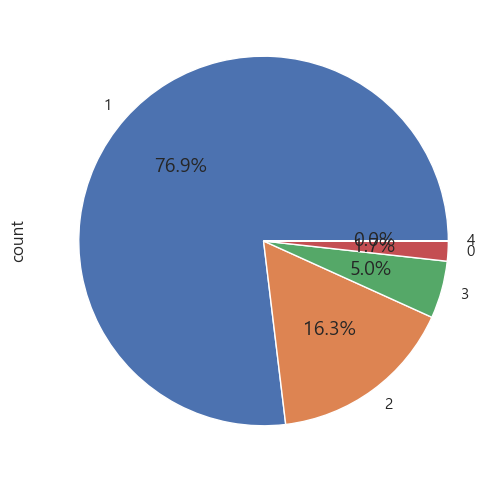

In [28]:
all_df['소지카드수_유효_신용'].value_counts().plot.pie(autopct='%.1f%%')

### 소지카드수_이용가능_신용
- 유요한 신용카드 중 BL로 등재되지 않아 이용 가능한 신용카드 수
- 이용가능 소지카드 수 : 0, 1, 2, 3장

In [30]:
# 소지카드수_이용가능_신용
all_df['소지카드수_이용가능_신용'].value_counts()

소지카드수_이용가능_신용
1    1723263
2     370561
0     205225
3     100951
Name: count, dtype: int64

<Axes: ylabel='count'>

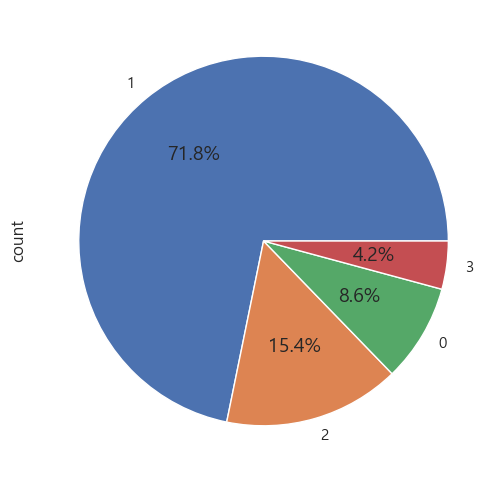

In [31]:
all_df['소지카드수_이용가능_신용'].value_counts().plot.pie(autopct='%.1f%%')

### 입회일자_신용
- 카드회원이 된 일자 (입회일자의 일단위 두자리는 01로 변경하여 월단위로 범주화)


In [33]:
# 입회일자_신용
all_df['입회일자_신용'].value_counts()

입회일자_신용
20180601    312138
20171201     25266
20180101     24882
20180301     24606
20170801     24486
             ...  
19911101        18
19910501         6
19910901         6
19901101         6
19910801         6
Name: count, Length: 325, dtype: int64

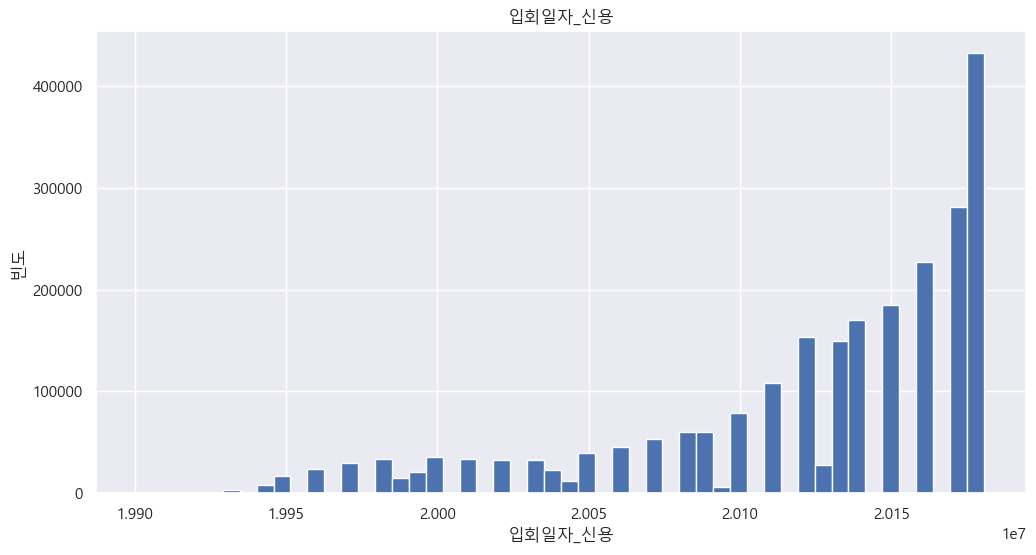

count     2400000
mean     20122577
std         60464
min      19901101
25%      20100301
50%      20140701
75%      20170601
max      20180601
Name: 입회일자_신용, dtype: int64


<Axes: xlabel='입회일자_신용'>

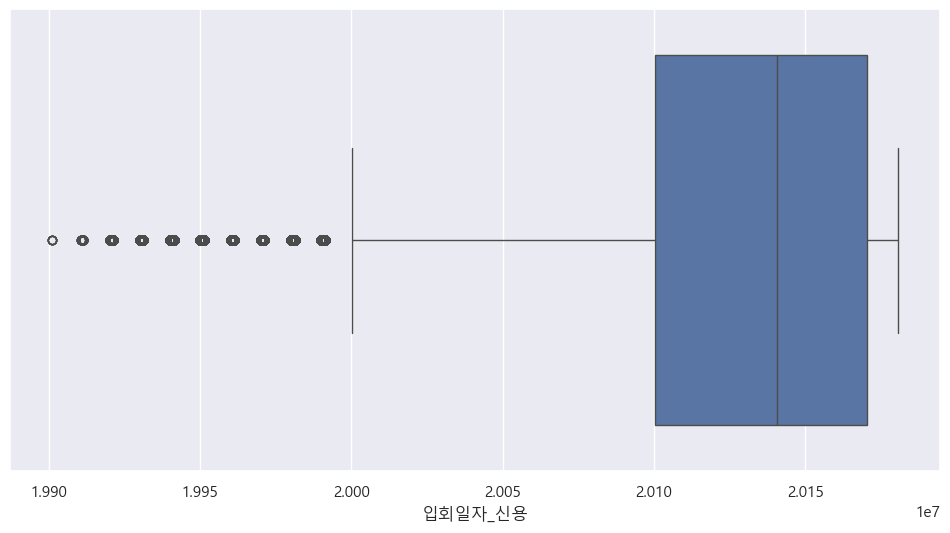

In [44]:
all_df['입회일자_신용'].hist(bins=50)
plt.xlabel('입회일자_신용')
plt.ylabel('빈도')
plt.title('입회일자_신용')
plt.show()

desc = all_df['입회일자_신용'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['입회일자_신용'])

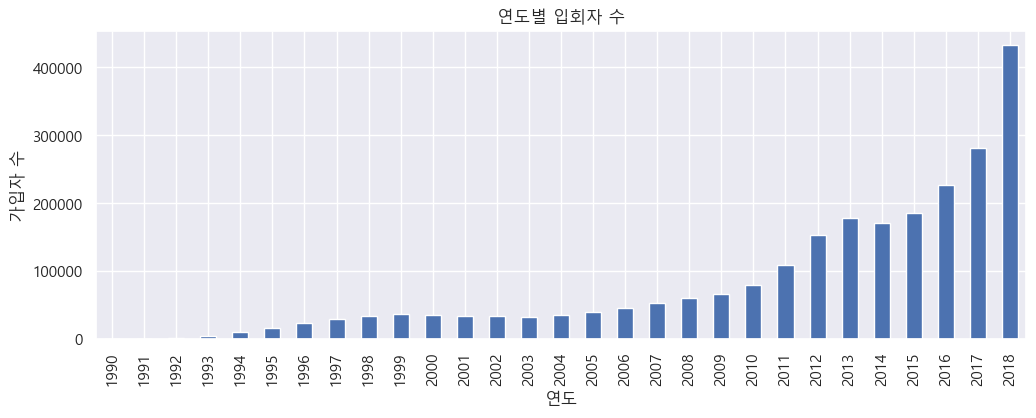

In [51]:
# 연도, 월 컬럼 추출
all_df['입회연도'] = all_df['입회일자_신용'] // 10000
all_df['입회월'] = (all_df['입회일자_신용'] % 10000) // 100

# 연도별 가입자 수
yearly_counts = all_df['입회연도'].value_counts().sort_index()
yearly_counts.plot(kind='bar', figsize=(12, 4))
plt.title('연도별 입회자 수')
plt.xlabel('연도')
plt.ylabel('가입자 수')
plt.show()

### 입회경과개월수_신용
- 신용카드를 소지한 이후 경과 개월 수

In [61]:
# 입회경과개월수_신용
all_df['입회경과개월수_신용'].value_counts()

입회경과개월수_신용
6      119886
5       64069
4       59968
3       55969
2       52023
        ...  
334         1
329         1
335         1
330         1
336         1
Name: count, Length: 335, dtype: int64

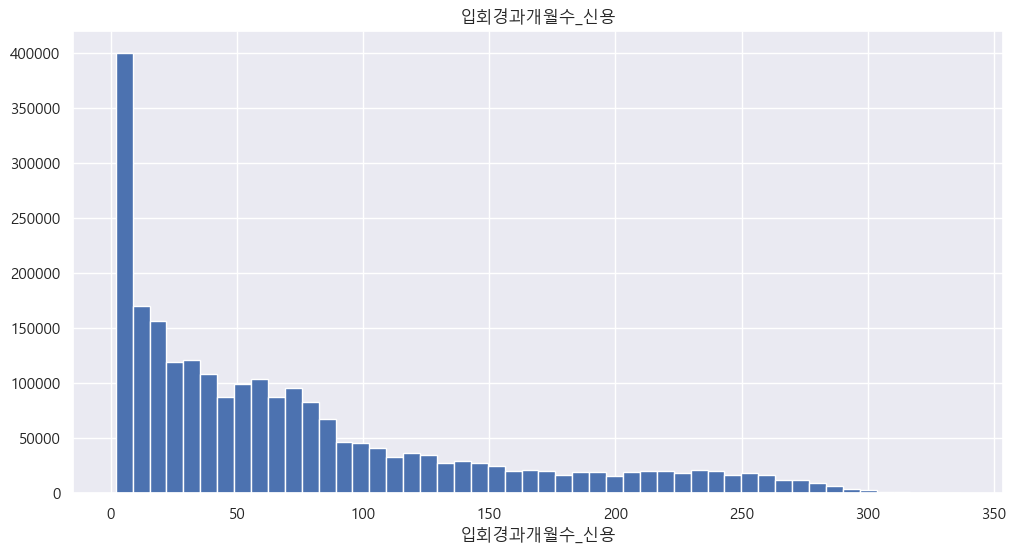

count    2400000
mean          73
std           72
min            2
25%           17
50%           51
75%          104
max          337
Name: 입회경과개월수_신용, dtype: int64


<Axes: xlabel='입회경과개월수_신용'>

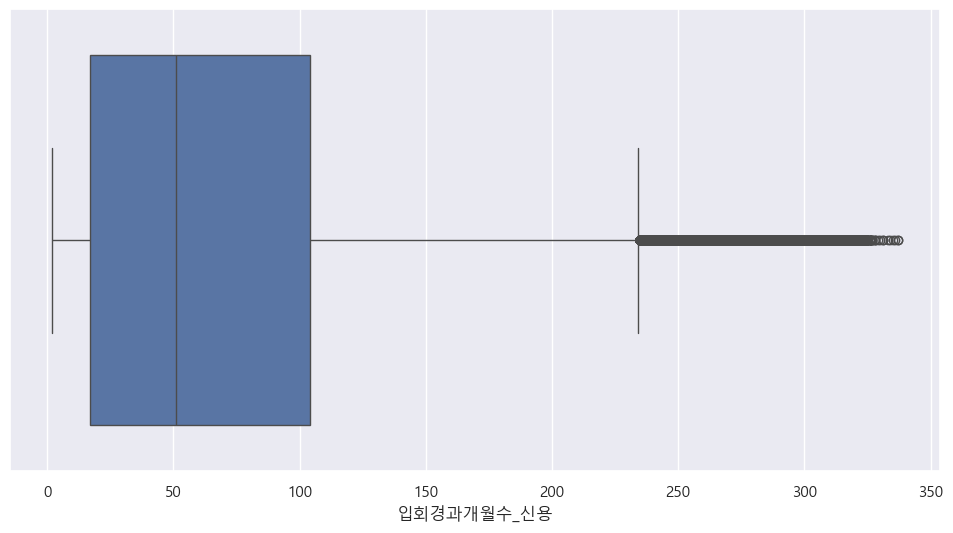

In [58]:
all_df['입회경과개월수_신용'].hist(bins=50)
plt.xlabel('입회경과개월수_신용')
plt.title('입회경과개월수_신용')
plt.show()

desc = all_df['입회경과개월수_신용'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['입회경과개월수_신용'])

### 회원여부_연체
- 연체 여부
- 0 / 1 로 구분
- 0 = 연체없음, 1 = 연체 있음
- 보통 카드사/금융사에서는 1이 위험 고객군(Risky)을 의미함

In [63]:
# 회원여부_연체
all_df['회원여부_연체'].value_counts()

회원여부_연체
0    2359008
1      40992
Name: count, dtype: int64

### 이용거절여부_카드론
- 카드론 이용거절여부

In [70]:
# 카드론 이용거절여부
all_df['이용거절여부_카드론'].value_counts()

이용거절여부_카드론
0    1925770
1     474230
Name: count, dtype: int64

### 동의여부_한도증액안내
- 한도증액안내 동의여부

In [73]:
# 동의여부_한도증액안내
all_df['동의여부_한도증액안내'].value_counts()

동의여부_한도증액안내
0    2163506
1     236494
Name: count, dtype: int64

### 수신거부여부_TM
- TM 수신거부여부

In [76]:
# 수신거부여부_TM
all_df['수신거부여부_TM'].value_counts()

수신거부여부_TM
0    1545358
1     854642
Name: count, dtype: int64

### 수신거부여부_DM
- DM 수신거부여부

In [79]:
# 수신거부여부_DM
all_df['수신거부여부_DM'].value_counts()

수신거부여부_DM
0    1646080
1     753920
Name: count, dtype: int64

### 수신거부여부_메일
- 메일 수신거부여부

In [84]:
# 수신거부여부_메일
all_df['수신거부여부_메일'].value_counts()

수신거부여부_메일
0    1632571
1     767429
Name: count, dtype: int64

### 수신거부여부_SMS
- SMS 수신거부여부

In [99]:
# 수신거부여부_SMS
all_df['수신거부여부_SMS'].value_counts(dropna=False)

수신거부여부_SMS
0    1513438
1     886562
Name: count, dtype: int64

### 가입통신회사코드
- 가입한 통신사 구분 코드
- 결측치 존재 (16.15%)
- S사, K사, L사

In [97]:
all_df['가입통신회사코드'].value_counts(dropna=False)

가입통신회사코드
S사      995637
K사      565208
L사      451585
None    387570
Name: count, dtype: int64

In [101]:
na_count = all_df['가입통신회사코드'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 387570개 (16.15%)


### 탈회횟수_누적
- 누적 탈회횟수

In [107]:
all_df['탈회횟수_누적'].value_counts(dropna=False)

탈회횟수_누적
0    1403785
1     759487
2     236728
Name: count, dtype: int64

<Axes: ylabel='count'>

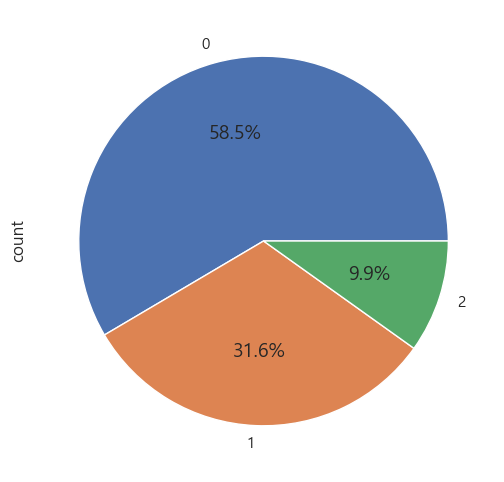

In [109]:
all_df['탈회횟수_누적'].value_counts().plot.pie(autopct='%.1f%%')

### 최종탈회후경과월
- 최종탈회 이후  경과 개월 수
- 0 개월이 가장 많음 : 방금 탈회했거나 이번 달 탈회한 사람들
- Max : 117 개월 -> 9년 9개월 경과

In [112]:
all_df['최종탈회후경과월'].value_counts(dropna=False)

최종탈회후경과월
0      1411713
47       76113
46       75812
48       73304
45       64384
        ...   
117          2
15           1
89           1
39           1
53           1
Name: count, Length: 71, dtype: int64

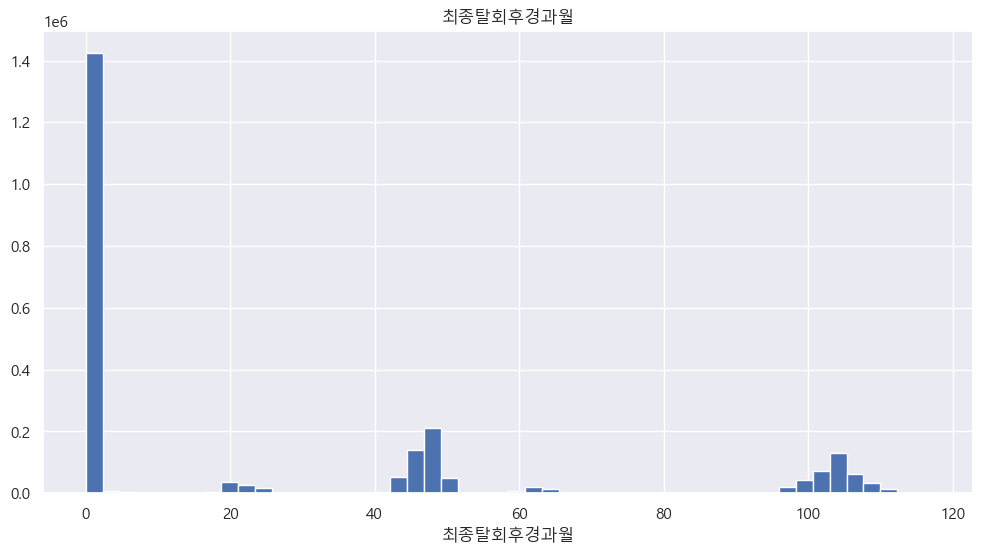

count    2400000
mean          27
std           38
min            0
25%            0
50%            0
75%           48
max          117
Name: 최종탈회후경과월, dtype: int64


<Axes: xlabel='최종탈회후경과월'>

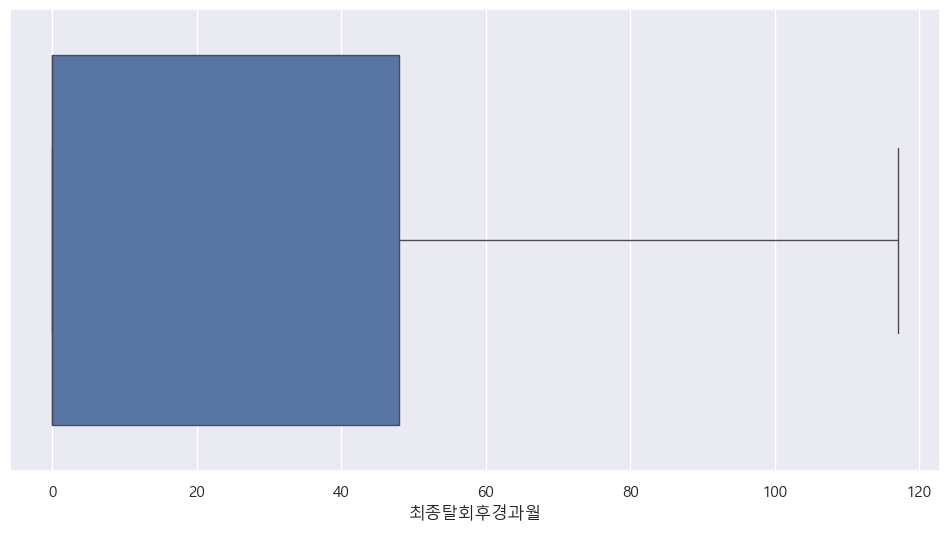

In [114]:
all_df['최종탈회후경과월'].hist(bins=50)
plt.xlabel('최종탈회후경과월')
plt.title('최종탈회후경과월')
plt.show()

desc = all_df['최종탈회후경과월'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['최종탈회후경과월'])

### 탈회횟수_발급6개월이내
- 발급6개월 이내 탈회 횟수
- 0 / 1 로 구분되어 있음.

In [119]:
all_df['탈회횟수_발급6개월이내'].value_counts(dropna=False)

탈회횟수_발급6개월이내
0    2302195
1      97805
Name: count, dtype: int64

### 탈회횟수_발급1년이내
- 발급1년 이내 탈회 횟수
- 0 / 1 로 구분되어 있음

In [123]:
all_df['탈회횟수_발급1년이내'].value_counts(dropna=False)

탈회횟수_발급1년이내
0    2245718
1     154282
Name: count, dtype: int64

### 거주시도명
- 17개 광역시도명
(서울, 부산, 대구, 인천, 광주, 대전, 울산, 세종, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주)

In [133]:
all_df['거주시도명'].value_counts(dropna=False)


거주시도명
서울    692656
경기    652987
인천    162815
부산    149007
대전    142800
충북    110601
경남     96244
경북     91237
대구     80687
울산     70491
전남     55304
광주     36659
충남     30091
전북     13572
강원     12156
제주      2544
세종       149
Name: count, dtype: int64

### 직장시도명
- 결측치 존재 (10.21%)

In [135]:
all_df['직장시도명'].value_counts(dropna=False)

직장시도명
경기      598244
서울      576618
None    244969
인천      146944
부산      131285
대전      120697
충북      103951
경남       94527
경북       82975
대구       76605
울산       66275
전남       52849
광주       34100
충남       28361
전북       20442
강원       15485
세종        3117
제주        2556
Name: count, dtype: int64

In [139]:
na_count = all_df['직장시도명'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 244969개 (10.21%)


### 마케팅동의여부
- 마케팅 동의 여부

In [143]:
all_df['직장시도명'].value_counts(dropna=False)

마케팅동의여부
1    1944017
0     455983
Name: count, dtype: int64

### 유효카드수_신용체크
- 유효한 카드수 (신용체크)

In [148]:
all_df['유효카드수_신용체크'].value_counts(dropna=False)

유효카드수_신용체크
1    936149
2    709422
3    404994
4    203891
5     79437
0     29233
6     26423
7      9395
8      1056
Name: count, dtype: int64

### 유효카드수_신용_가족

In [151]:
all_df['유효카드수_신용_가족'].value_counts(dropna=False)

유효카드수_신용_가족
0    2331548
1      49336
2      19116
Name: count, dtype: int64

### 유효카드수_체크

In [154]:
all_df['유효카드수_체크'].value_counts(dropna=False)

유효카드수_체크
0    1436752
1     661328
2     215445
3      86475
Name: count, dtype: int64

### 유효카드수_체크_가족

In [157]:
all_df['유효카드수_체크_가족'].value_counts(dropna=False)

유효카드수_체크_가족
0    2399964
1         35
2          1
Name: count, dtype: int64

### 이용가능카드수_신용체크

In [160]:
all_df['이용가능카드수_신용체크'].value_counts(dropna=False)

이용가능카드수_신용체크
1    945107
2    692678
3    358846
4    185705
0    111452
5     72702
6     24067
7      8532
8       911
Name: count, dtype: int64

### 이용가능카드수_신용

In [162]:
all_df['이용가능카드수_신용'].value_counts(dropna=False)

이용가능카드수_신용
1    1443851
2     486521
0     188157
3     175252
4      92228
5      13991
Name: count, dtype: int64

### 이용가능카드수_신용_가족

In [166]:
all_df['이용가능카드수_신용_가족'].value_counts(dropna=False)

이용가능카드수_신용_가족
0    2331859
1      49106
2      19035
Name: count, dtype: int64

### 이용가능카드수_체크

In [169]:
all_df['이용가능카드수_체크'].value_counts(dropna=False)

이용가능카드수_체크
0    1439532
1     662696
2     212783
3      84989
Name: count, dtype: int64

### 이용가능카드수_체크_가족

In [172]:
all_df['이용가능카드수_체크_가족'].value_counts(dropna=False)

이용가능카드수_체크_가족
0    2399983
1         14
2          3
Name: count, dtype: int64

### 이용카드수_신용체크
- 이용 중인 카드수 (신용체크)

In [175]:
all_df['이용카드수_신용체크'].value_counts(dropna=False)

이용카드수_신용체크
1    1125925
2     536157
0     433328
3     222779
4      72103
5       9454
6        254
Name: count, dtype: int64

### 이용카드수_신용

In [178]:
all_df['이용카드수_신용'].value_counts(dropna=False)

이용카드수_신용
1    1250336
0     492003
2     456168
3     149119
4      52325
5         49
Name: count, dtype: int64

### 이용카드수_체크

In [181]:
all_df['이용카드수_체크'].value_counts(dropna=False)

이용카드수_체크
0    2022815
1     370162
2       7023
Name: count, dtype: int64

### 이용카드수_체크_가족

In [184]:
all_df['이용카드수_체크_가족'].value_counts(dropna=False)

이용카드수_체크_가족
0    2400000
Name: count, dtype: int64

### 이용금액_R3M_신용체크
- 이용금액 (최근3개월간)_신용체크

In [187]:
all_df['이용금액_R3M_신용체크'].value_counts(dropna=False)

이용금액_R3M_신용체크
0         442011
2184         122
1643         115
1945         115
1857         115
           ...  
109770         1
111667         1
89913          1
127851         1
116441         1
Name: count, Length: 124193, dtype: int64

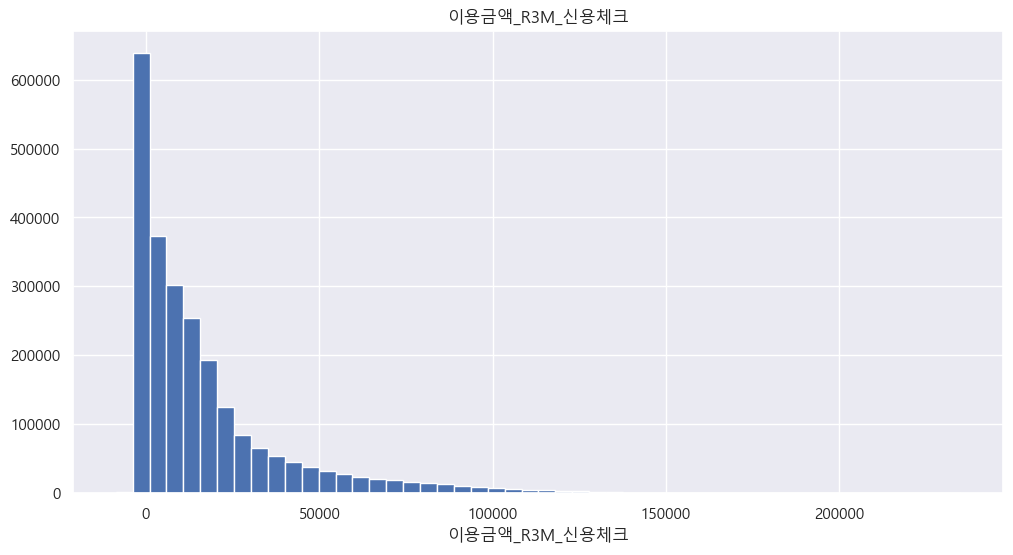

count    2400000
mean       16937
std        23247
min        -8749
25%          432
50%         8879
75%        21793
max       235195
Name: 이용금액_R3M_신용체크, dtype: int64


<Axes: xlabel='이용금액_R3M_신용체크'>

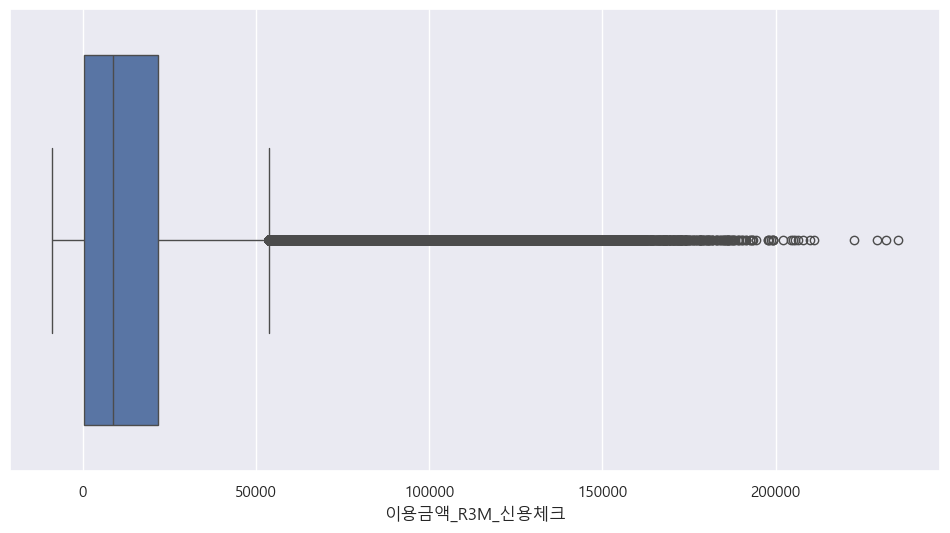

In [189]:
all_df['이용금액_R3M_신용체크'].hist(bins=50)
plt.xlabel('이용금액_R3M_신용체크')
plt.title('이용금액_R3M_신용체크')
plt.show()

desc = all_df['이용금액_R3M_신용체크'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_신용체크'])

### 이용금액_R3M_신용
- 마이너스값 존재함..

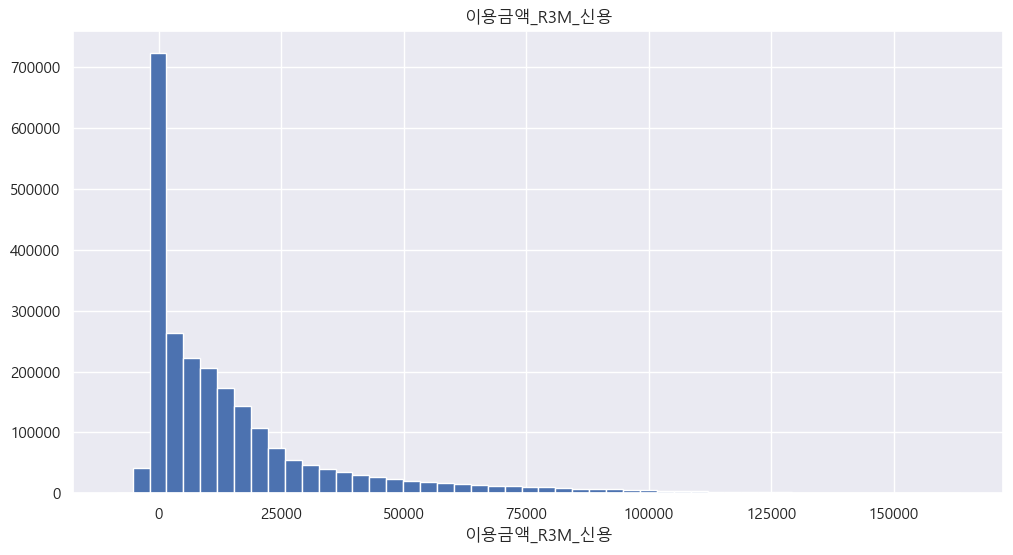

count    2400000
mean       15286
std        21898
min        -8749
25%            0
50%         7681
75%        19568
max       163706
Name: 이용금액_R3M_신용, dtype: int64


<Axes: xlabel='이용금액_R3M_신용'>

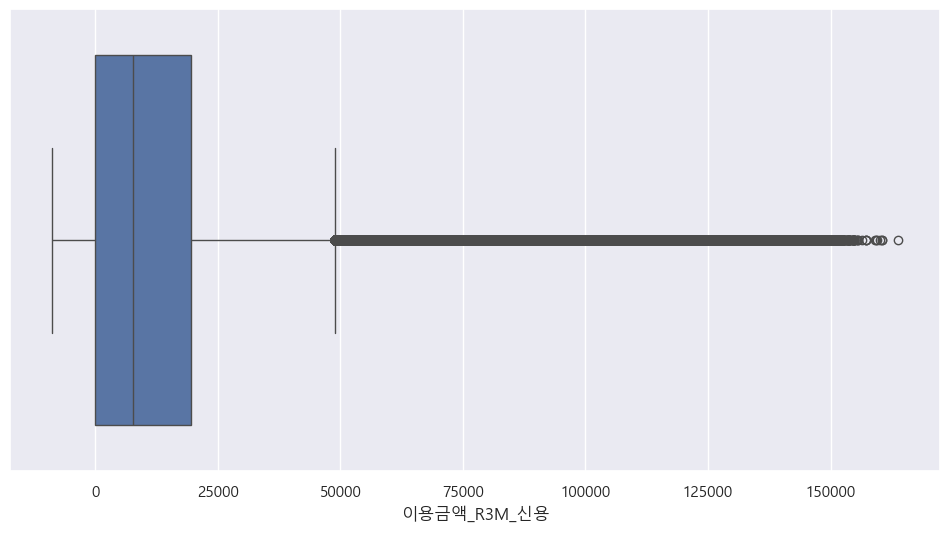

In [192]:
all_df['이용금액_R3M_신용'].hist(bins=50)
plt.xlabel('이용금액_R3M_신용')
plt.title('이용금액_R3M_신용')
plt.show()

desc = all_df['이용금액_R3M_신용'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_신용'])

### 이용금액_R3M_신용_가족

In [199]:
all_df['이용금액_R3M_신용체크'].value_counts(dropna=False)

이용금액_R3M_신용체크
0         442011
2184         122
1643         115
1945         115
1857         115
           ...  
109770         1
111667         1
89913          1
127851         1
116441         1
Name: count, Length: 124193, dtype: int64

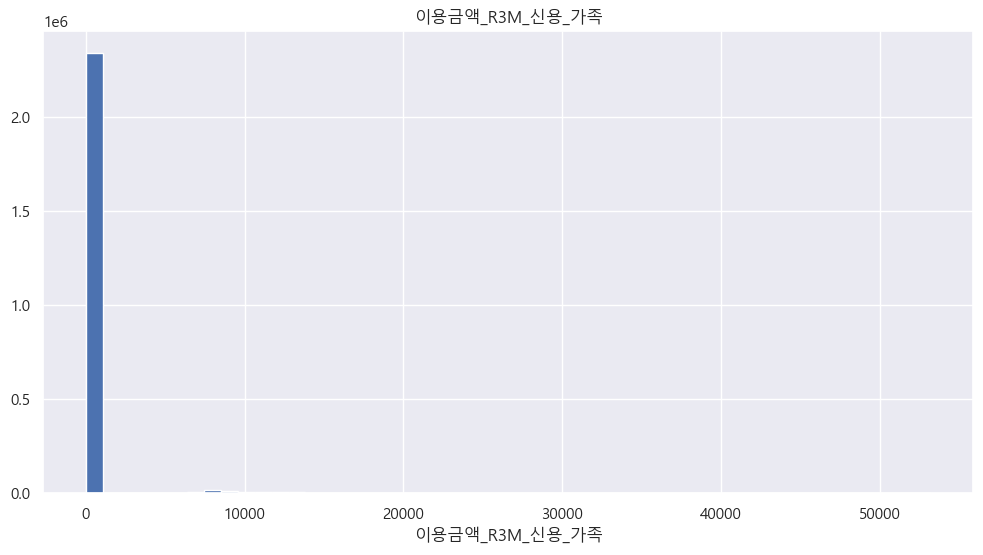

count    2400000
mean         280
std         1764
min            0
25%            0
50%            0
75%            0
max        53199
Name: 이용금액_R3M_신용_가족, dtype: int64


<Axes: xlabel='이용금액_R3M_신용_가족'>

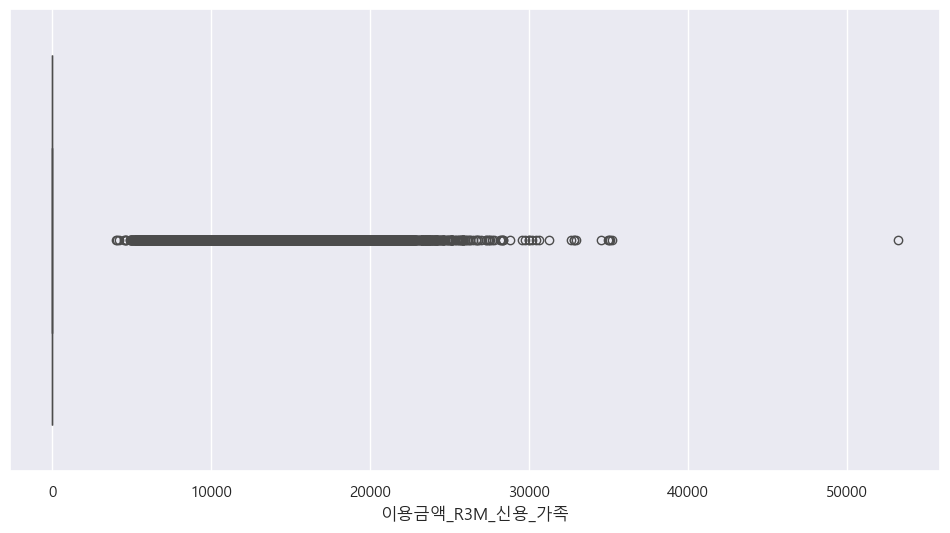

In [195]:
all_df['이용금액_R3M_신용_가족'].hist(bins=50)
plt.xlabel('이용금액_R3M_신용_가족')
plt.title('이용금액_R3M_신용_가족')
plt.show()

desc = all_df['이용금액_R3M_신용_가족'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_신용_가족'])

### 이용금액_R3M_체크

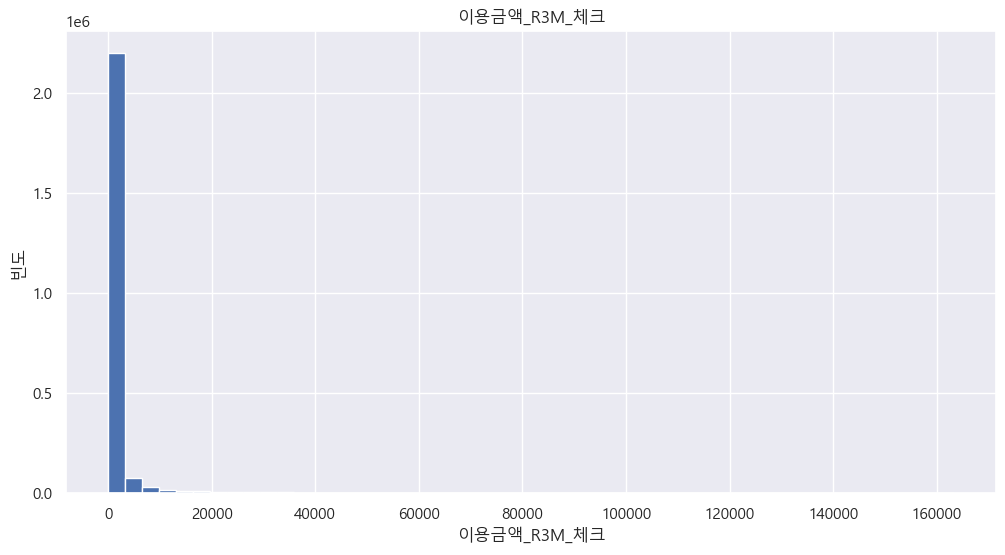

count    2400000
mean        1650
std         7528
min            0
25%            0
50%            0
75%            0
max       163250
Name: 이용금액_R3M_체크, dtype: int64


<Axes: xlabel='이용금액_R3M_체크'>

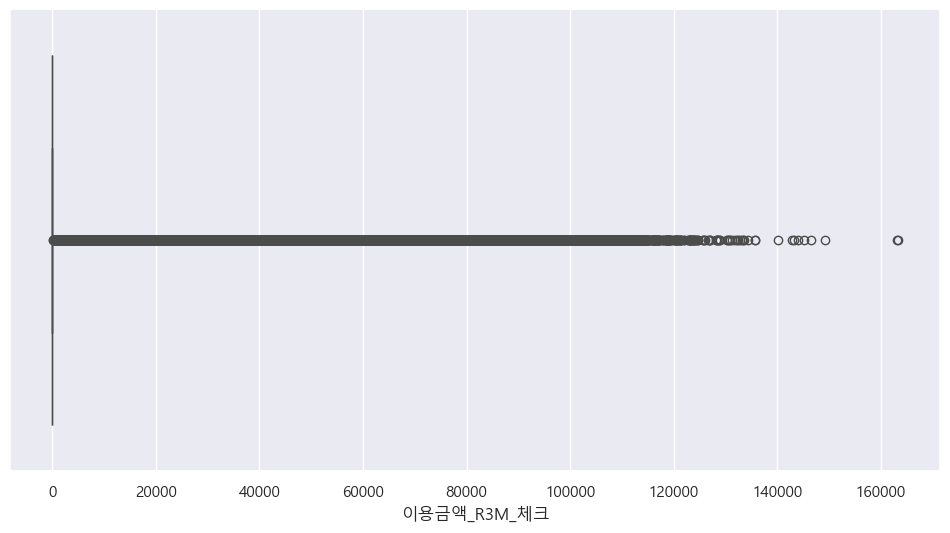

In [206]:
all_df['이용금액_R3M_체크'].hist(bins=50)
plt.xlabel('이용금액_R3M_체크')
plt.ylabel('빈도')
plt.title('이용금액_R3M_체크')
plt.show()

desc = all_df['이용금액_R3M_체크'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_체크'])

### 이용금액_R3M_체크_가족
- 전부 0원

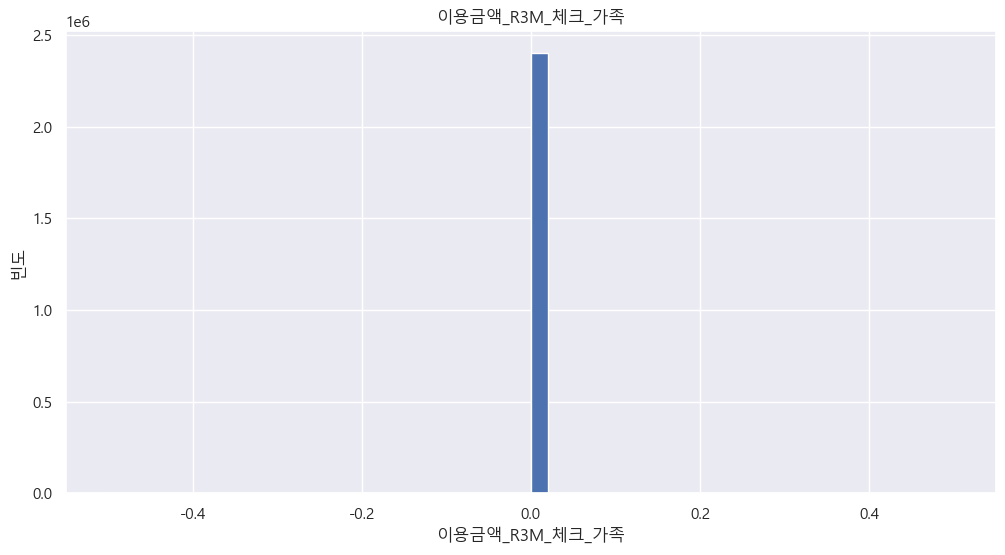

count    2400000
mean           0
std            0
min            0
25%            0
50%            0
75%            0
max            0
Name: 이용금액_R3M_체크_가족, dtype: int64


<Axes: xlabel='이용금액_R3M_체크_가족'>

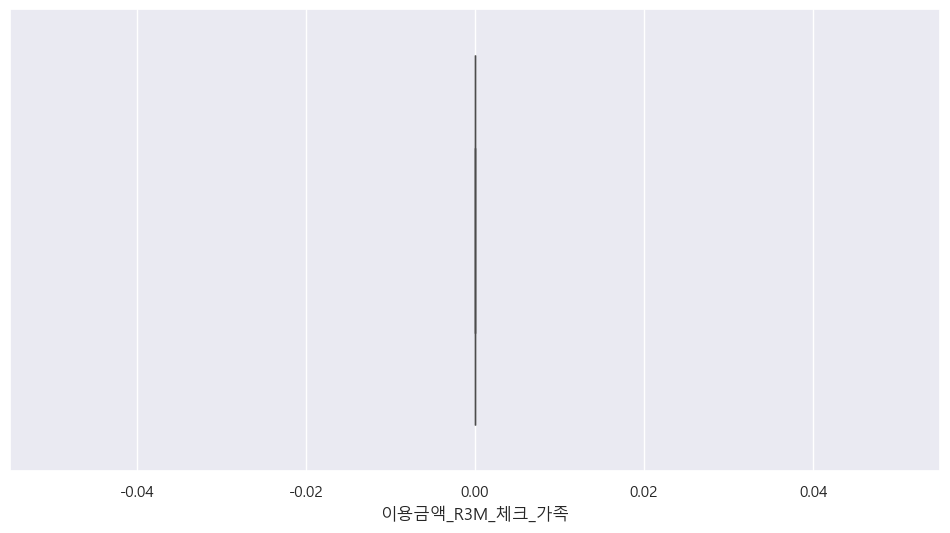

In [209]:
all_df['이용금액_R3M_체크_가족'].hist(bins=50)
plt.xlabel('이용금액_R3M_체크_가족')
plt.ylabel('빈도')
plt.title('이용금액_R3M_체크_가족')
plt.show()

desc = all_df['이용금액_R3M_체크_가족'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_체크_가족'])

In [215]:
all_df['이용금액_R3M_체크_가족'].value_counts()

이용금액_R3M_체크_가족
0    2400000
Name: count, dtype: int64

### _1순위카드이용금액
- 1순위 이용 카드의 이용금액
- 마이더스 금액이 존재함...

In [225]:
all_df['_1순위카드이용금액'].value_counts()

_1순위카드이용금액
0        491101
1399        144
386         143
796         143
1133        142
          ...  
84157         1
89745         1
64520         1
71711         1
56510         1
Name: count, Length: 81963, dtype: int64

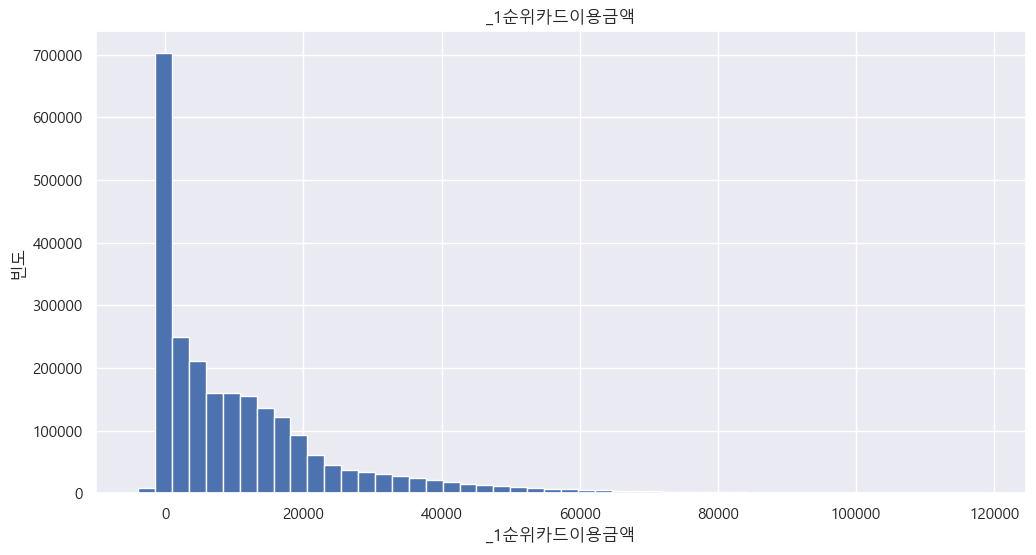

count    2400000
mean       11020
std        14090
min        -3925
25%            0
50%         6255
75%        15979
max       118507
Name: _1순위카드이용금액, dtype: int64


<Axes: xlabel='_1순위카드이용금액'>

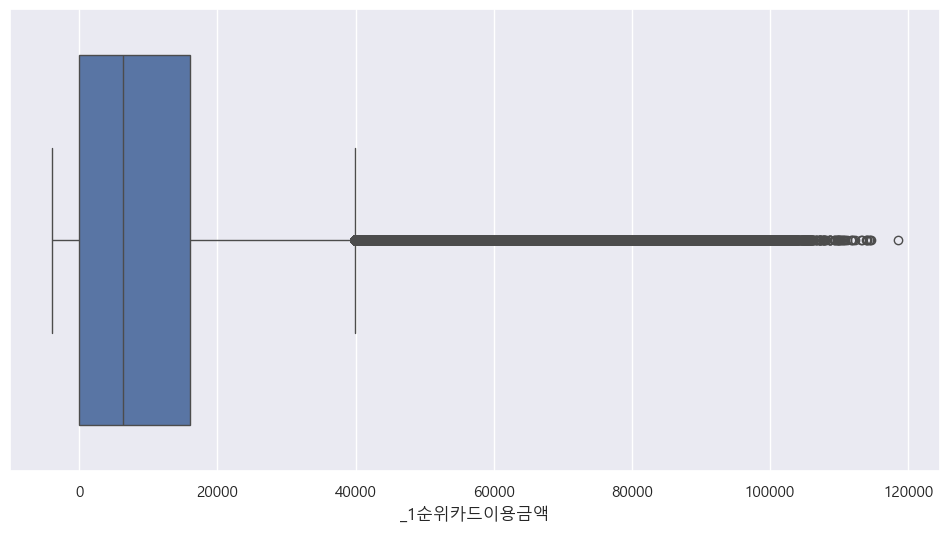

In [229]:
all_df['_1순위카드이용금액'].hist(bins=50)
plt.xlabel('_1순위카드이용금액')
plt.ylabel('빈도')
plt.title('_1순위카드이용금액')
plt.show()

desc = all_df['_1순위카드이용금액'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_1순위카드이용금액'])

### _1순위카드이용건수
- 1순위 이용 카드의 이용 건수
- 이용 건수에 마이너스가 있을 수 있나 ? 어떤 의미인가 ?
- -2, -1의 의미는 ??

In [227]:
all_df['_1순위카드이용건수'].value_counts()

_1순위카드이용건수
-2      421728
-1       66230
 0       65256
 1       62980
 2       59690
         ...  
 220        27
 221        16
 222        11
 223         3
 224         2
Name: count, Length: 227, dtype: int64

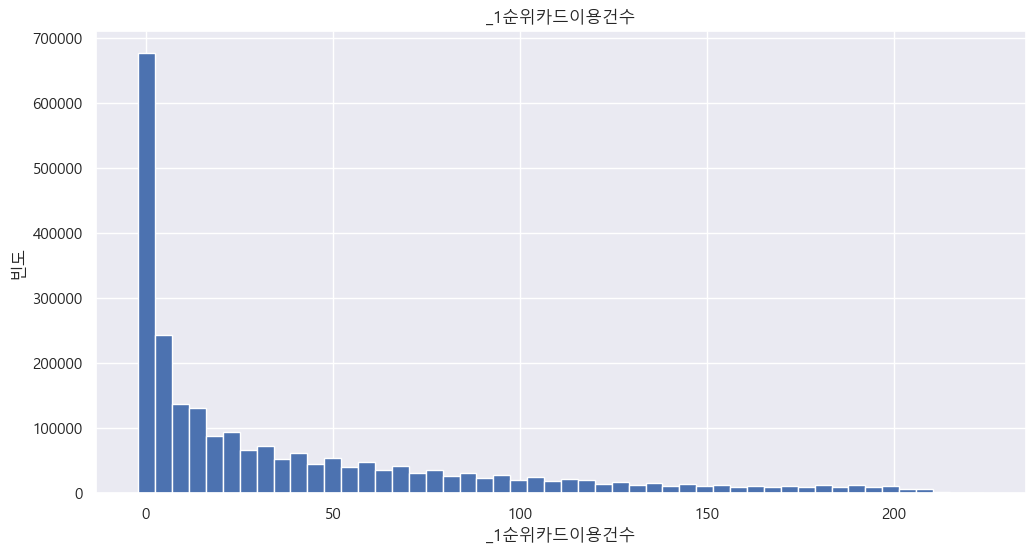

count    2400000
mean          39
std           51
min           -2
25%            1
50%           17
75%           61
max          224
Name: _1순위카드이용건수, dtype: int64


<Axes: xlabel='_1순위카드이용건수'>

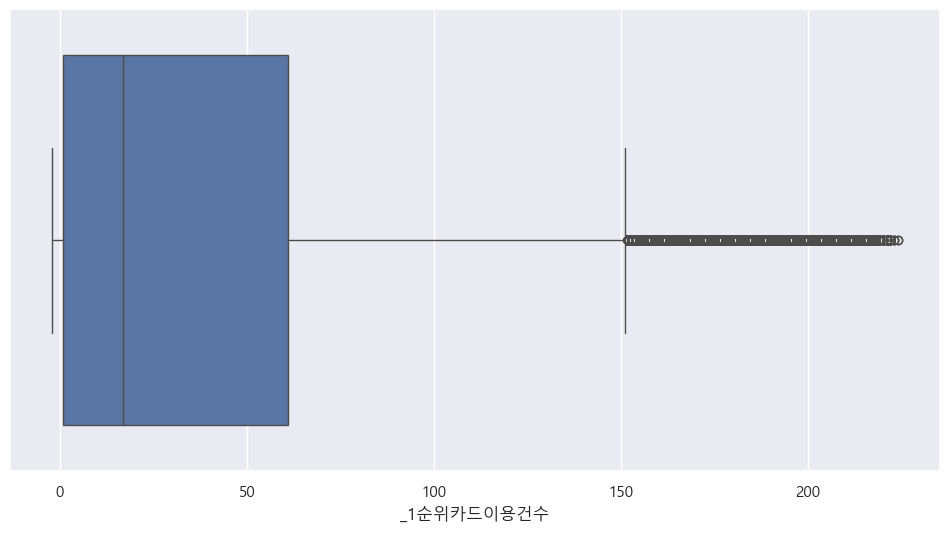

In [234]:
all_df['_1순위카드이용건수'].hist(bins=50)
plt.xlabel('_1순위카드이용건수')
plt.ylabel('빈도')
plt.title('_1순위카드이용건수')
plt.show()

desc = all_df['_1순위카드이용건수'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_1순위카드이용건수'])

### _1순위신용체크구분
- 1순위 이용 카드의 신용,체크 구분
- 신용 / 체크 로 구분되어 있음
- 결측치 존재함 (1.16%)

In [245]:
all_df['_1순위신용체크구분'].value_counts(dropna=False)

_1순위신용체크구분
신용      2295461
체크        76589
None      27950
Name: count, dtype: int64

In [249]:
na_count = all_df['_1순위신용체크구분'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 27950개 (1.16%)


### _2순위카드 이용금액
- 마이너스 이용금액 존재함.

In [253]:
all_df['_2순위카드이용금액'].value_counts(dropna=False)

_2순위카드이용금액
0        1711749
6239          78
5716          76
6017          76
6088          76
          ...   
41088          1
69036          1
49818          1
39054          1
36150          1
Name: count, Length: 53948, dtype: int64

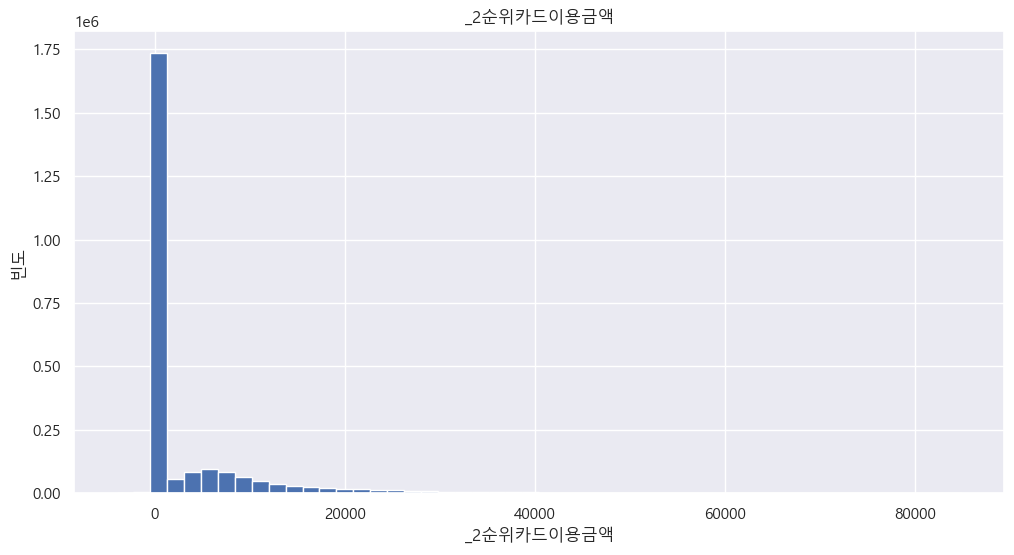

count    2400000
mean        3372
std         7707
min        -4042
25%            0
50%            0
75%         3201
max        84966
Name: _2순위카드이용금액, dtype: int64


<Axes: xlabel='_2순위카드이용금액'>

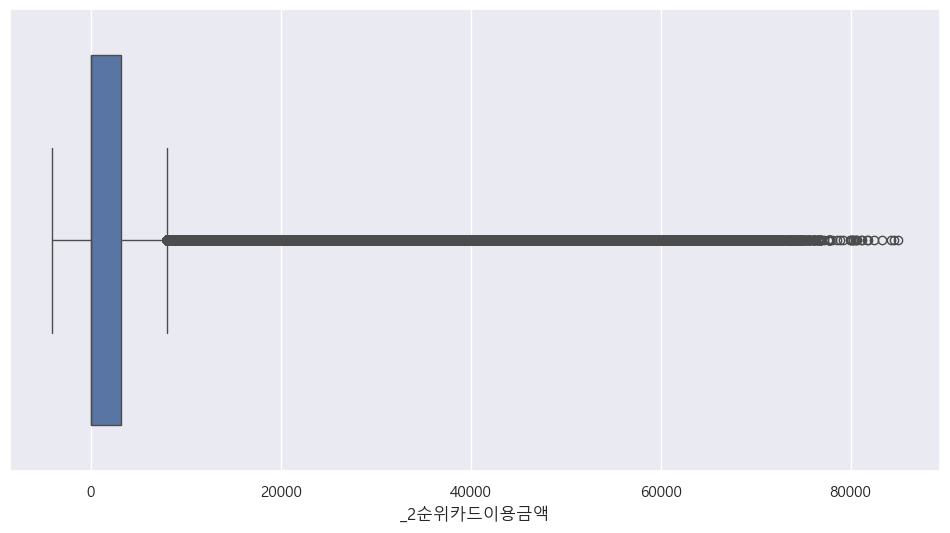

In [255]:
all_df['_2순위카드이용금액'].hist(bins=50)
plt.xlabel('_2순위카드이용금액')
plt.ylabel('빈도')
plt.title('_2순위카드이용금액')
plt.show()

desc = all_df['_2순위카드이용금액'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_2순위카드이용금액'])

### _2순위카드이용건수
- 이용건수에 마이너스 값 있음...

In [259]:
all_df['_2순위카드이용건수'].value_counts(dropna=False)

_2순위카드이용건수
0      1713170
29       12456
27       12388
31       12297
30       12228
        ...   
206          5
204          4
205          3
203          3
209          3
Name: count, Length: 209, dtype: int64

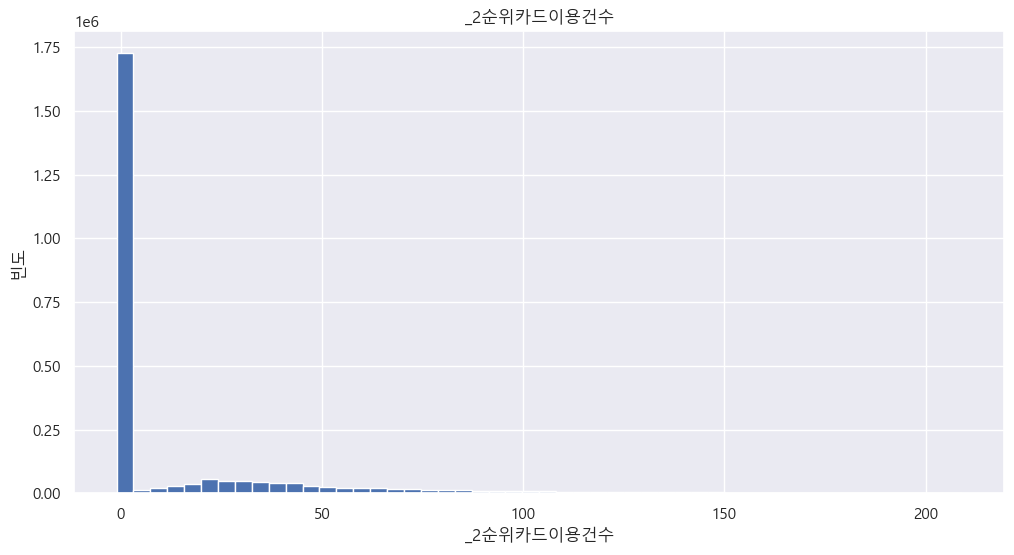

count    2400000
mean          14
std           29
min           -1
25%            0
50%            0
75%           16
max          209
Name: _2순위카드이용건수, dtype: int64


<Axes: xlabel='_2순위카드이용건수'>

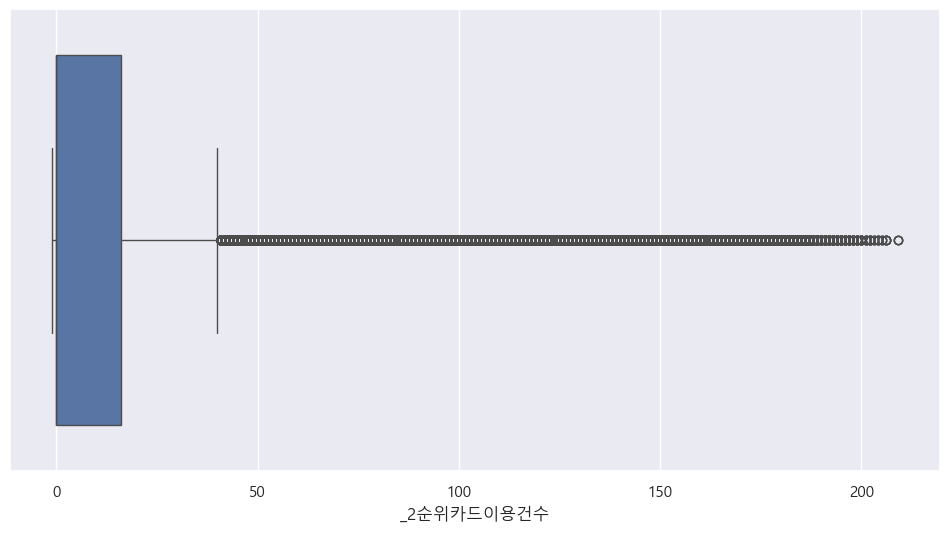

In [261]:
all_df['_2순위카드이용건수'].hist(bins=50)
plt.xlabel('_2순위카드이용건수')
plt.ylabel('빈도')
plt.title('_2순위카드이용건수')
plt.show()

desc = all_df['_2순위카드이용건수'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_2순위카드이용건수'])

### _2순위신용체크구분
- 신용 / 체크로 구분되어 있음

- 결측치 존재 (39.92 %)

In [269]:
all_df['_2순위신용체크구분'].value_counts(dropna=False)

_2순위신용체크구분
None    958115
신용      873447
체크      568438
Name: count, dtype: int64

In [271]:
na_count = all_df['_2순위신용체크구분'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 958115개 (39.92%)


### 최종유효년월_신용_이용가능
- 이용가능한 신용카드의 최종 유효년월
- 결측치 <Na> 문자열로 존재함.
- 8.77 %

In [301]:
all_df['최종유효년월_신용_이용가능'].value_counts(dropna=False)

최종유효년월_신용_이용가능
<NA>      210447
202208     66949
202207     66486
202210     66020
202209     64576
           ...  
201809        62
201808        40
201807        14
201806         6
201805         2
Name: count, Length: 75, dtype: int64

In [303]:
# 실제로 '<NA>' 값이 문자열인지 확인
all_df['최종유효년월_신용_이용가능'].unique()[:10]

array(['202110', '202112', '202111', '202201', '202002', '202211',
       '202107', '202209', '<NA>', '202001'], dtype=object)

In [305]:
# 문자열 '<NA>'를 진짜 결측치로 바꾸기
all_df['최종유효년월_신용_이용가능'] = all_df['최종유효년월_신용_이용가능'].replace('<NA>', pd.NA)

In [313]:
na_count = all_df['최종유효년월_신용_이용가능'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 210447개 (8.77%)


### 최종유효년월_신용_이용
- 이용중인 신용카드의 최종 유효년월
- 결측치 존재 (22.26%)

In [318]:
all_df['최종유효년월_신용_이용'].value_counts(dropna=False)

최종유효년월_신용_이용
NaN         534231
202207.0     62997
202208.0     62145
202210.0     60683
202205.0     60367
             ...  
201811.0        42
201810.0        16
201809.0         8
201807.0         2
201808.0         1
Name: count, Length: 73, dtype: int64

In [320]:
na_count = all_df['최종유효년월_신용_이용'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 534231개 (22.26%)


### 최종카드발급일자
- 최종 발급받은 카드의 발급일자
- 결측치 존재 (1.75%)

In [324]:
all_df['최종카드발급일자'].value_counts(dropna=False)

최종카드발급일자
NaN           41965
20180705.0     4011
20180707.0     3873
20180703.0     3837
20180701.0     3834
              ...  
20130818.0        6
20131014.0        6
20130919.0        6
20130804.0        6
20131015.0        6
Name: count, Length: 1940, dtype: int64

In [326]:
na_count = all_df['최종카드발급일자'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 41965개 (1.75%)


### 보유여부_해외겸용_본인
- 해외겸용 카드 보유 여부

In [330]:
all_df['보유여부_해외겸용_본인'].value_counts(dropna=False)

보유여부_해외겸용_본인
1    1876902
0     523098
Name: count, dtype: int64

### 이용가능여부_해외겸용_본인

In [333]:
all_df['이용가능여부_해외겸용_본인'].value_counts(dropna=False)

이용가능여부_해외겸용_본인
1    1809391
0     590609
Name: count, dtype: int64

### 이용여부_3M_해외겸용_본인
- 해외겸용 신용카드 최근3개월 이용 여부

In [336]:
all_df['이용여부_3M_해외겸용_본인'].value_counts(dropna=False)

이용여부_3M_해외겸용_본인
1    1452960
0     947040
Name: count, dtype: int64

### 연회비발생카드수_BOM
- 연회비발생카드수(당월)
- 0개 / 1개이상

In [340]:
all_df['연회비발생카드수_B0M'].value_counts(dropna=False)

연회비발생카드수_B0M
0개      2394826
1개이상       5174
Name: count, dtype: int64

### 연회비할인카드수_BOM
- 연회비할인카드수(당월)
- 전부 0 장

In [344]:
all_df['연회비할인카드수_B0M'].value_counts(dropna=False)

연회비할인카드수_B0M
0    2400000
Name: count, dtype: int64

### 기본연회비_BOM
- 기본연회비(당월)

In [349]:
all_df['기본연회비_B0M'].value_counts(dropna=False)

기본연회비_B0M
0      2396961
108        906
109        639
107        565
50         381
106        222
105        120
104         76
110         67
103         30
49          25
111          4
102          3
101          1
Name: count, dtype: int64

### 제휴연회비_BOM
- 제휴연회비(당월)

In [352]:
all_df['제휴연회비_B0M'].value_counts(dropna=False)

제휴연회비_B0M
0      2399128
950        446
949        418
30           3
29           2
149          1
951          1
150          1
Name: count, dtype: int64

### 할인금액_기본연회비_BOM
- 전부 0

In [357]:
all_df['할인금액_기본연회비_B0M'].value_counts()

할인금액_기본연회비_B0M
0    2400000
Name: count, dtype: int64

### 할인금액_제휴연회비_BOM
- 전부 0

In [361]:
all_df['할인금액_제휴연회비_B0M'].value_counts()

할인금액_제휴연회비_B0M
0    2400000
Name: count, dtype: int64

### 청구금액_기본연회비_BOM

In [367]:
all_df['청구금액_기본연회비_B0M'].value_counts()

청구금액_기본연회비_B0M
0      2396961
108        906
109        639
107        565
50         381
106        222
105        120
104         76
110         67
103         30
49          25
111          4
102          3
101          1
Name: count, dtype: int64

### 청구금액_제휴연회비_BOM

In [370]:
all_df['청구금액_제휴연회비_B0M'].value_counts()


청구금액_제휴연회비_B0M
0      2399128
950        446
949        418
30           3
29           2
149          1
951          1
150          1
Name: count, dtype: int64

### 상품관련면제카드수_BOM
- 전부 0개

In [373]:
all_df['상품관련면제카드수_B0M'].value_counts()

상품관련면제카드수_B0M
0개    2400000
Name: count, dtype: int64

### 임직원면제카드수_BOM
- 전부 0개

In [379]:
all_df['임직원면제카드수_B0M'].value_counts()

임직원면제카드수_B0M
0개    2400000
Name: count, dtype: int64

### 우수회원면제카드수_BOM
- 전부 0개

In [383]:
all_df['우수회원면제카드수_B0M'].value_counts()

우수회원면제카드수_B0M
0개    2400000
Name: count, dtype: int64

### 기타면제카드수_BOM

In [389]:
all_df['기타면제카드수_B0M'].value_counts()

기타면제카드수_B0M
0개    2400000
Name: count, dtype: int64

### 카드신청건수
- 0건, 1건

In [392]:
all_df['카드신청건수'].value_counts()

카드신청건수
0    2189218
1     210782
Name: count, dtype: int64

### Life_Stage
- 생애주기 구분
- 자녀성장(1) / 자녀성장(2) / 자녀출산기 / 가족구축기 / 노년생활 / 자녀독립기 / 독신

In [399]:
all_df['Life_Stage'].value_counts(dropna=False)

Life_Stage
자녀성장(1)    795610
자녀성장(2)    591048
자녀출산기      245797
가족구축기      242373
노년생활       233300
자녀독립기      198237
독신          93635
Name: count, dtype: int64

### 최종카드발급경과일

In [402]:
all_df['최종카드발급경과월'].value_counts()

최종카드발급경과월
0     78140
14    74479
13    73671
15    73642
16    73152
      ...  
63       41
64       20
65        4
66        1
67        1
Name: count, Length: 68, dtype: int64

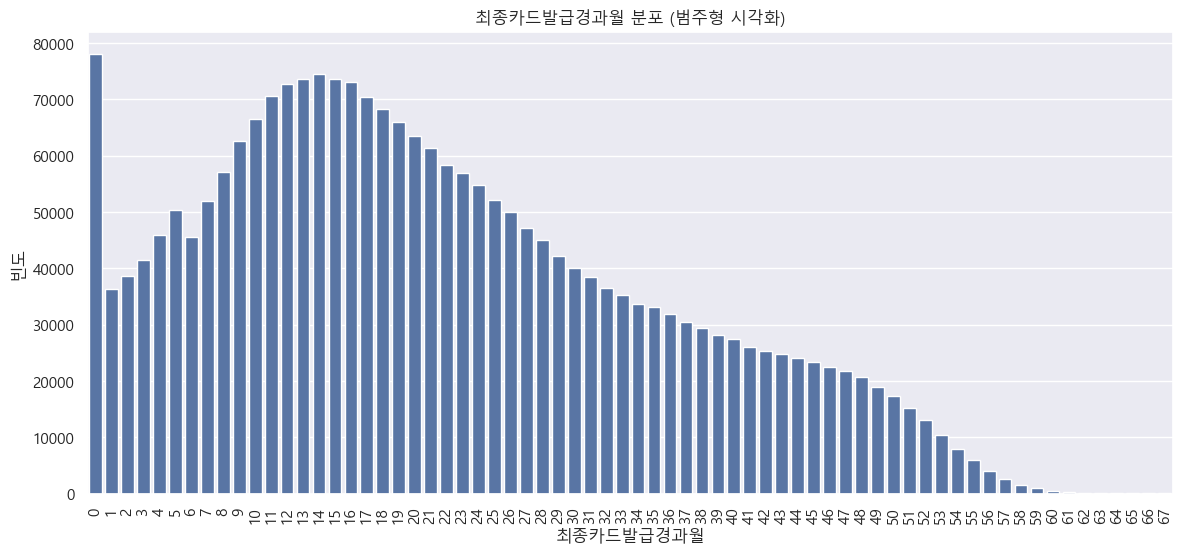

In [406]:
# 값 개수 정렬
cnts = all_df['최종카드발급경과월'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(x=cnts.index, y=cnts.values)
plt.xticks(rotation=90)
plt.xlabel('최종카드발급경과월')
plt.ylabel('빈도')
plt.title('최종카드발급경과월 분포 (범주형 시각화)')
plt.show()

In [408]:
all_df['최종카드발급경과월'].describe()

count    2.400000e+06
mean     2.145997e+01
std      1.378313e+01
min      0.000000e+00
25%      1.100000e+01
50%      1.900000e+01
75%      3.100000e+01
max      6.700000e+01
Name: 최종카드발급경과월, dtype: float64

In [17]:
all_df.to_csv('open/train_1.회원정보.csv', index=False)